In [1]:
import pixiedust
import torch
from torch import nn
import pathlib
from torch.utils.data import DataLoader
from torchvision import *

Pixiedust database opened successfully


In [2]:
device = torch.device("cuda:1" if torch.cuda.is_available() else "cpu")

In [3]:
transformtrain= transforms.Compose([
    transforms.Resize((150,150)),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),              #convert the value to tensor
    transforms.Normalize((.5,.5,.5), (.5,.5,.5))         # convert all the value form -1 to 1 for all RGB
])

In [4]:
transformtest= transforms.Compose([
    transforms.Resize((150,150)),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),              #convert the value to tensor
    transforms.Normalize((.5,.5,.5), (.5,.5,.5))         # convert all the value form -1 to 1 for all RGB
])

In [5]:
ls


 Volume in drive C has no label.
 Volume Serial Number is F4CC-B9CC

 Directory of C:\Users\Iconsense\Documents\virat\abhi

03/13/2020  06:31 PM    <DIR>          .
03/13/2020  06:31 PM    <DIR>          ..
03/13/2020  02:46 PM    <DIR>          .ipynb_checkpoints
03/13/2020  02:47 PM       363,152,213 intel-image-classification.zip
03/13/2020  06:31 PM            11,651 pytorch_classify.ipynb
03/13/2020  02:48 PM    <DIR>          seg_pred
03/13/2020  02:49 PM    <DIR>          seg_test
03/13/2020  02:49 PM    <DIR>          seg_train
               2 File(s)    363,163,864 bytes
               6 Dir(s)  163,178,565,632 bytes free


In [6]:
traindata=datasets.ImageFolder('seg_train/seg_train' , transform=transformtrain)

In [7]:
testdata=datasets.ImageFolder('seg_test/seg_test', transform=transformtest)

In [8]:
trainloader=DataLoader(traindata, batch_size=128, shuffle=True)

In [9]:
len(trainloader)

110

In [10]:
testloader=DataLoader(testdata,batch_size=128,shuffle=True)

In [11]:
len(testloader)

24

In [12]:
classes=['buildings','forest','glacier','mountain','sea','street']

In [13]:
noclass=len(classes)

In [14]:
model=models.vgg19(pretrained=True).to(device)
for param in model.features.parameters():
    param.requires_grad=False

In [15]:
model

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padd

In [16]:
model.classifier[6]=nn.Linear(model.classifier[6].in_features,noclass).to(device)
criterion=nn.CrossEntropyLoss()
optimizer=torch.optim.Adam(model.classifier.parameters(),lr=0.0001)

In [17]:

#%%pixie_debugger

In [18]:
trainlosses = []
testlosses = []
for e in range(7):
    trainloss = 0
    traintotal = 0
    trainsuccessful = 0
    for traininput, trainlabel in trainloader:
        traininputs, trainlabels = traininput.to(device), trainlabel.to(device)
        optimizer.zero_grad()
        trainpredictions = model(traininputs)
        _, trainpredict = torch.max(trainpredictions.data, 1)
        loss = criterion(trainpredictions, trainlabels)
        loss.backward()
        optimizer.step()
        trainloss += loss.item()
        traintotal += trainlabels.size(0)
        trainsuccessful += (trainpredict == trainlabels).sum().item()
    else:
        testlos
        
        
        
        s = 0
        testtotal = 0
        testsuccessful = 0
        with torch.no_grad():
            for testinput, testlabel in testloader:
                testinputs, testlabels = testinput.to(device), testlabel.to(device)
                testpredictions = model(testinputs)
                _, testpredict = torch.max(testpredictions.data, 1)
                tloss = criterion(testpredictions, testlabels)
                testloss += tloss.item()
                testtotal += testlabels.size(0)
                testsuccessful += (testpredict == testlabels).sum().item()
        trainlosses.append(trainloss/len(trainloader))
        testlosses.append(testloss/len(testloader))
        print('Train Accuracy %{:.2f}'.format(100*trainsuccessful/traintotal))
        print('Test Accuracy %{:.2f}'.format(100*testsuccessful/testtotal))

Train Accuracy %86.84
Test Accuracy %89.83
Train Accuracy %91.72
Test Accuracy %90.23
Train Accuracy %92.95
Test Accuracy %90.73
Train Accuracy %94.01
Test Accuracy %90.60
Train Accuracy %94.39
Test Accuracy %91.17
Train Accuracy %95.29
Test Accuracy %91.60
Train Accuracy %95.96
Test Accuracy %91.23


In [ ]:
#next(iter(trainloader))

In [19]:
loss.item()

0.24500532448291779

In [20]:
import matplotlib.pyplot as plt

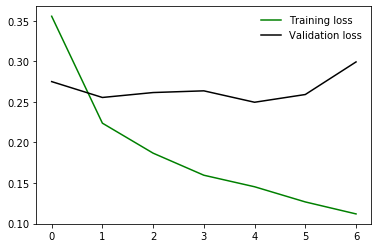

In [21]:
plt.plot(trainlosses, label='Training loss', color='green')
plt.plot(testlosses, label='Validation loss', color ='black')
plt.legend(frameon=False)
plt.show()

In [22]:
from PIL import Image
import numpy as np

In [23]:
    
from PIL import Image
import numpy as np   
    
    
    

In [25]:
img = Image.open('seg_pred/seg_pred/3966.jpg')

In [26]:
nimg = np.array(img)

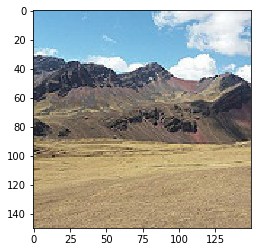

In [27]:
plt.imshow(nimg)


In [28]:
pimg = transformtest(img).unsqueeze(0).to(device)

In [29]:
pimg.shape

torch.Size([1, 3, 150, 150])

In [30]:
prediction = model(pimg)

In [31]:
_, tpredict = torch.max(prediction.data, 1)

In [32]:
classes[tpredict[0].item()]

'mountain'